# Most Basic Bayesian Interview Question

---

Are you familiar with Bayesian inference?

> Yes!

Well then you must know **the law of total probability**! What's that?

> What proportion of students will pass this class $\Pr(pass)$ if you know $\Pr(pass|quick)$ as well as the distribution of $quick$?

Now what proportion of students who will pass the class answer this question quickly?

> The structure of this question is **_the most basic Bayesian interview question_**, but it requires some assumptions...

# Bayesian Terminology
---

## Bayes Theorem

\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
&={} \frac{{p(x, \theta)}}{\underset{\text{marginal likelihood}}{\displaystyle \int p(x|\theta)p(\theta) d\theta}} \textrm{ or }
\frac{{p(x, \theta)}}{\underset{\text{law of total probability}}{\displaystyle \sum_{k} p(x|\theta_k)p(\theta_k)}} =
\frac{\overset{joint}{p(x, \theta)}}{\underset{\text{normalizing constant}}{c}}
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

# Example
---
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} C^n_k\theta^{x}(1-\theta)^{n-x}\\
&&& \quad\; [\text{exponential family distribution if $n$ is known}]\\
&&& \quad\; [\text{What is this distribution? What is $C^n_k$?}]\\\\
\text{Prior} && p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \\
&&& \quad\; [\text{$\alpha$ and $\beta$ are called }\textbf{hyperparameters}]\\
&&& \quad\; [\text{What is this distribution? What is $\Gamma(\cdot)$?}]\\\\
\text{Posterior} && p(\theta|x,n,\alpha,\beta) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \frac{C^n_k\theta^{x}(1-\theta)^{n-x}  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} }{p(x)} \\
&&& = \;\texttt{What distribution parameterized how?}
\end{align*}


# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.
- $P(\text{pass}) = 0.9$.  
- $P(\text{fail}) = 1 - P(\text{pass}) = 0.1$.  
- $P(\text{quick} \mid \text{pass}) = 0.6$.  
- $P(\text{quick} \mid \text{fail}) = 0.3$.

$$
P(\text{quick}) = P(\text{quick} \mid \text{pass}) \cdot P(\text{pass}) + P(\text{quick} \mid \text{fail}) \cdot P(\text{fail})
$$
Substituting the given values:
$$
P(\text{quick}) = (0.6 \times 0.9) + (0.3 \times 0.1) = 0.54 + 0.03 = 0.57
$$
According to Bayes' theorem:
$$
P(\text{pass} \mid \text{quick}) = \frac{P(\text{quick} \mid \text{pass}) \cdot P(\text{pass})}{P(\text{quick})}
$$
Substituting the values:
$$
P(\text{pass} \mid \text{quick}) = \frac{0.6 \times 0.9}{0.57} = \frac{0.54}{0.57} \approx 0.947
$$
The proportion of students who answer the question quickly and pass the class is approximately $P(\text{pass} \mid \text{quick}) \approx 0.947$.

---

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Given:

- Likelihood:  
  $$ p(x \mid \theta, n) = \text{Multinomial} $$

- Prior:  
  $$ p(\theta \mid \boldsymbol{\alpha}) = \text{Dirichlet} $$

We want to compute the Posterior using Bayes' theorem:

$$
p(\theta \mid x, n, \boldsymbol{\alpha}) = \frac{p(x \mid \theta) p(\theta)}{p(x)}
$$

Since the prior is a Dirichlet distribution and the likelihood is a multinomial distribution, the posterior is also a Dirichlet distribution. This property is the conjugacy of the Dirichlet prior with the multinomial likelihood.

Therefore, the posterior distribution is:

$$
p(\theta \mid x, n, \boldsymbol{\alpha}) = \text{Dirichlet}(\boldsymbol{\alpha} + x)
$$

The Dirichlet distribution is the conjugate prior for the multinomial likelihood. So when a Dirichlet prior is combined with a multinomial likelihood, the resulting posterior is also a Dirichlet distribution.The parameters of the posterior Dirichlet distribution are obtained by adding the observed counts \( x \) to the prior parameters $ \boldsymbol{\alpha}$.

---

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



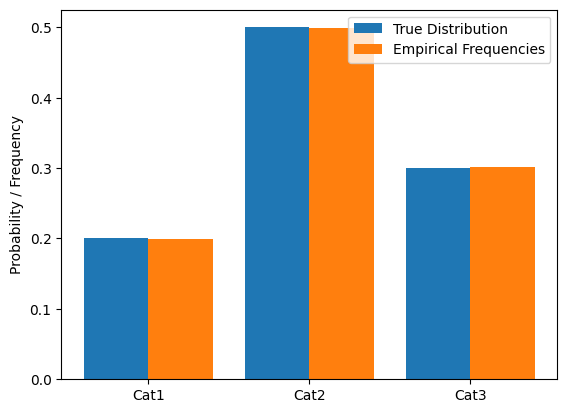

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial, dirichlet
import plotly.express as px
import pandas as pd

# 1) Sample from a 3-category multinomial
p = [0.2, 0.5, 0.3]
n = 1000
counts = multinomial.rvs(n=n, p=p)
freqs = counts / n

# 2) Compare true distribution vs. sample
plt.bar([0,1,2], p, width=0.4, label='True Distribution')
plt.bar([0.4,1.4,2.4], freqs, width=0.4, label='Empirical Frequencies')
plt.xticks([0.2,1.2,2.2], ['Cat1','Cat2','Cat3'])
plt.ylabel("Probability / Frequency")
plt.legend()
plt.show()

# 3) Dirichlet prior/posterior
alpha_prior = np.array([1,1,1])
alpha_posterior = alpha_prior + counts
samples_prior = dirichlet.rvs(alpha_prior, size=1000)
samples_posterior = dirichlet.rvs(alpha_posterior, size=1000)


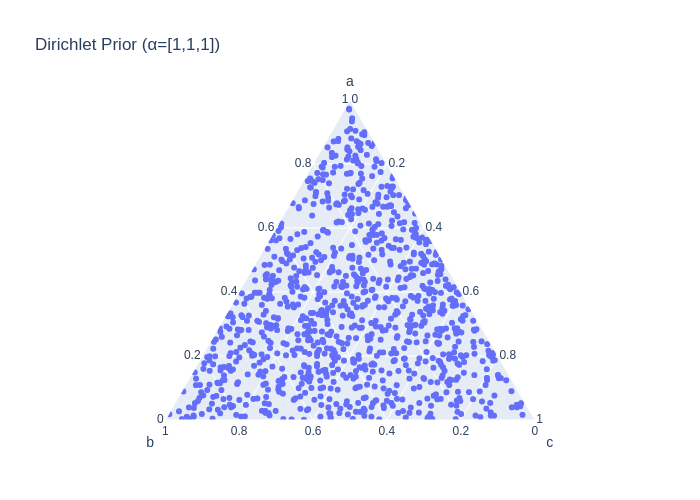

In [ ]:
# 4) Ternary plots (prior and posterior) - Static PNG
df_prior = pd.DataFrame(samples_prior, columns=['a','b','c'])
fig_prior = px.scatter_ternary(df_prior, a='a', b='b', c='c',
                               title="Dirichlet Prior (α=[1,1,1])")
fig_prior.show("png")

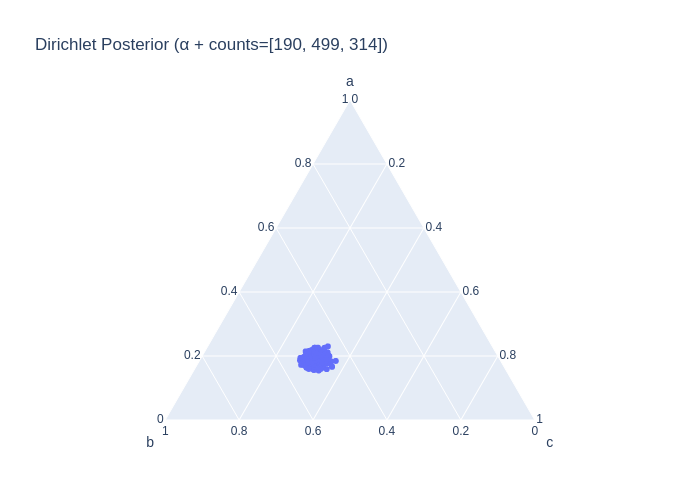

In [ ]:
df_post = pd.DataFrame(samples_posterior, columns=['a','b','c'])
fig_post = px.scatter_ternary(df_post, a='a', b='b', c='c',
                              title=f"Dirichlet Posterior (α + counts={alpha_posterior.tolist()})")
fig_post.show("png")